In [1]:
using Plots, LaTeXStrings, Interact
# pyplot()

# importing newton_method
include("unconstrained_methods.jl")

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1317
┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1317


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-14652002657862931467\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8905672681214959892\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-14652002657862931467\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Precompiling ForwardDiff [f6369f11-7733-5829-9624-2563aa707210]
└ @ Base loading.jl:1317


bfgs (generic function with 4 methods)

In [2]:
# More or less well behaved
f(x) = exp(-(x[1]-3)/2) + exp((4x[2] + x[1])/10) + exp((-4x[2] + x[1])/10)

# This one shows a divergent behaviour
# f(x) = log(exp(-x[1] + exp(-x[2]) + exp(x[1] + x[2])))

xstart = [5; 5];
xc = coordinate_descent(f, xstart)
xg = gradient(f, xstart, EXACT)
xn = newton_method(f, xstart, EXACT)

Starting coordinate descent...
Coordinate descent converged.
 Total steps: 4
 Total time (s): 0.33083391189575195
 Sol. found: [4.0271511363739245, -2.0167839847818508e-8]/ Opt. value: 3.5901136498284183



LoadError: UndefVarError: EXACT not defined

## Newton behaviour

In [ ]:
gr()

# Calculating first- and second-order derivatives
∇(f,x) = ForwardDiff.gradient(f, x);
H(f,x) = ForwardDiff.hessian(f, x);

# Plotting the contours of the function to be optimised
n = 100
xg = range(-10, 15, length=n)
yg = copy(xg)

xstart = [-4.38776; 2.2449] # starting point

# Method calculating correct trajectory
# xn = newton_method(f, xstart, EXACT, 100, 1e-2)
xn = bfgs(f, xstart, EXACT)

# Forms the visualisation
@manipulate for x1 = xg, x2 = yg 
    xk = [x1; x2]
    fx = f(xk)
    gx = ∇(f,xk)
    Hx = H(f,xk)
    m(d) = fx + dot(gx, d) + 0.5 * dot(d, Hx * d)
    q(y) = m(y - xk)

    contour(xg, yg, (x,y) -> f([x; y]), 
             levels = [3.6, 4, 5, 6 , 8, 10, 15, 20, 30, 70],
             xaxis = ("x₁", (-7.5, 12.5)),
             yaxis = ("x₂", (-10, 10)),
             clims = (0,75),
#              clabels = true,
             cbar = false,
             aspect_ratio = :equal,
             size = (900,900),
             label = "f"   
    )

    contour!(xg, yg, (x,y) -> q([x; y]), 
        levels = 5, 
        c = :1
    )
    
    # Solving H(x)d = - ∇f(c)
    d = -Hx \ gx 
    
    plot!([x1, x1 + d[1]], [x2, x2+ d[2]], 
        c = :1, 
        label = "Newton step", 
        line = :arrow, 
        marker = :dot 
    )
    
    plot!(xn[1,:], xn[2,:], 
        marker = :circle, 
        label = "Optimal path"
    )
    
    annotate!(xn[1] + 0.1,xn[2] + 0.1, (L"x_0", :bottom))
end


Starting quasi-Newton (BFGS) method...
Quasi-Newton (BFGS) converged.
 Total steps: 6
 Total time (s): 0.20616793632507324
 Sol. found: [4.027151194071883, 6.503172868985417e-10]/ Opt. value: 3.590113649828418



Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x1"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/Fabricio/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/Fabricio/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/Fabricio/.julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/Users/Fabricio/.julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/Users/Fabricio/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000108c53a90, Task (runnable) @0x0000000108c53a90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-10.0\",\"-9.74747\",\"-9.49495\",\"-9.24242\",\"-8.9899\",\"-8.73737\",\"-8.48485\",\"-8.23232\",\"-7.9798\",\"-7.72727\",\"-7.47475\",\"-7.22222\",\"-6.9697\",\"-6.71717\",\"-6.46465\",\"-6.21212\",\"-5.9596\",\"-5.70707\",\"-5.4

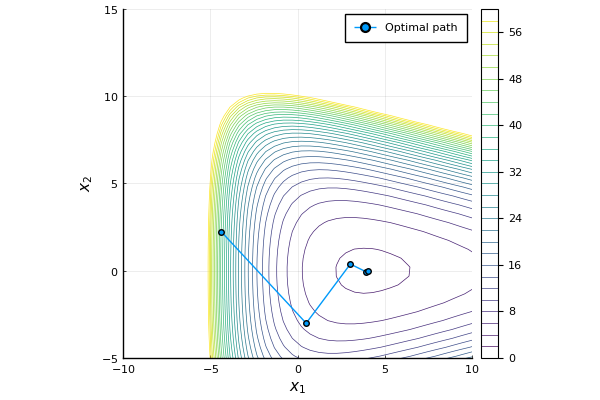

In [54]:
# Color and visual's testing for updating pictures.xs
pyplot()
contour(xg, yg, (x,y) -> f([x; y]), 
             levels = [0 + 2i for i = 0:30],
             xaxis = (L"x_1", (-10, 10)),
             yaxis = (L"x_2", (-5, 15)),
             clims = (0,60),
             contour_labels = false,
             colorbar = true,
             fill = false, fillalpha = 0.8,
             linewidth = 0.5,
#            size = (400,400),
#            colorbar = true,
             aspect_ratio = :equal,
             label = "f",
             color = :viridis
    )

plot!(xn[1,:], xn[2,:], 
        marker = :circle,
        label = "Optimal path",
        color = 1)

In [6]:
palette(:default)

In [25]:
color1 = RGB(104/255,82/255,255/255)
color2 = RGB(170/255,75/255,165/255)
color3 = RGB(219/255,47/255,108/255)

color_scheme = cgrad([color1, color2, color3, :orange, :yellow])